# NLP Project

## Download of the Dataset

In [1]:
from utils.seeder import set_random_seed
SEED = 42

set_random_seed(SEED)

c:\Users\riccardo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import os

In [3]:
def get_labels_list(row: pd.Series) -> pd.Series:
    return [index for index, value in row.items() if value == 1]

def get_dataframe(data_folder: str, df_type: str) -> pd.DataFrame:
    assert df_type in ['training', 'validation', 'test', 'validation-zhihu'], 'Specify the `df_type` as either training, validation or test'
    
    arguments_df = pd.read_csv(os.path.join(data_folder, f'arguments-{df_type}.tsv'), sep='\t', header=0)
    labels_df = pd.read_csv(os.path.join(data_folder, f'labels-{df_type}.tsv'), sep='\t', header=0)
    
    arguments_df['Labels'] = labels_df.apply(lambda x: get_labels_list(x), axis=1)
    
    arguments_df.drop('Argument ID', axis=1, inplace=True)
    labels_df.drop('Argument ID', axis=1, inplace=True)
    
    return arguments_df, labels_df

In [4]:
arguments_train_df, labels_train_df = get_dataframe('data', 'training')
arguments_test_df, labels_test_df = get_dataframe('data', 'validation')

In [5]:
print('Arguments dataframe structure:')
arguments_train_df.head()

Arguments dataframe structure:


,Conclusion,Stance,Premise,Labels
0,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,[Security: societal]
1,We should ban fast food,in favor of,fast food should be banned because it is reall...,[Security: personal]
2,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]"
3,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer..."
4,We should ban factory farming,against,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ..."


In [6]:
print('Labels dataframe structure:')
labels_train_df.head()

Labels dataframe structure:


,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [7]:
print(f'Number of rows of the train dataframe: {len(arguments_train_df)}')
print(f'Number of rows of the test dataframe: {len(arguments_test_df)}')

Number of rows of the train dataframe: 5393
Number of rows of the test dataframe: 1896


In [8]:
from sklearn.model_selection import train_test_split

arguments_train_df, arguments_val_df, labels_train_df, labels_val_df = train_test_split(
    arguments_train_df, labels_train_df, test_size=.33, random_state=SEED)

arguments_train_df.reset_index(drop=True, inplace=True)
labels_train_df.reset_index(drop=True, inplace=True)
arguments_val_df.reset_index(drop=True, inplace=True)
labels_val_df.reset_index(drop=True, inplace=True)

In [9]:
print(f'Number of rows of the train dataframe after splitting: {len(arguments_train_df)}')
print(f'Number of rows of the validation dataframe after splitting: {len(arguments_val_df)}')

Number of rows of the train dataframe after splitting: 3613
Number of rows of the validation dataframe after splitting: 1780


In [10]:
import matplotlib.pyplot as plt 

def plot_stance_distribution(arguments_df: pd.DataFrame, title: str = 'Stance distribution'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 10))
    arguments_df.Stance.value_counts().plot(ax=ax, kind='bar')


    # Show just the x grid
    ax.grid(axis='x')

    # set title and axis labels
    plt.suptitle(title)

    ax.set_xlabel('stance')
    ax.set_ylabel('count')

    plt.tight_layout()


    plt.show()

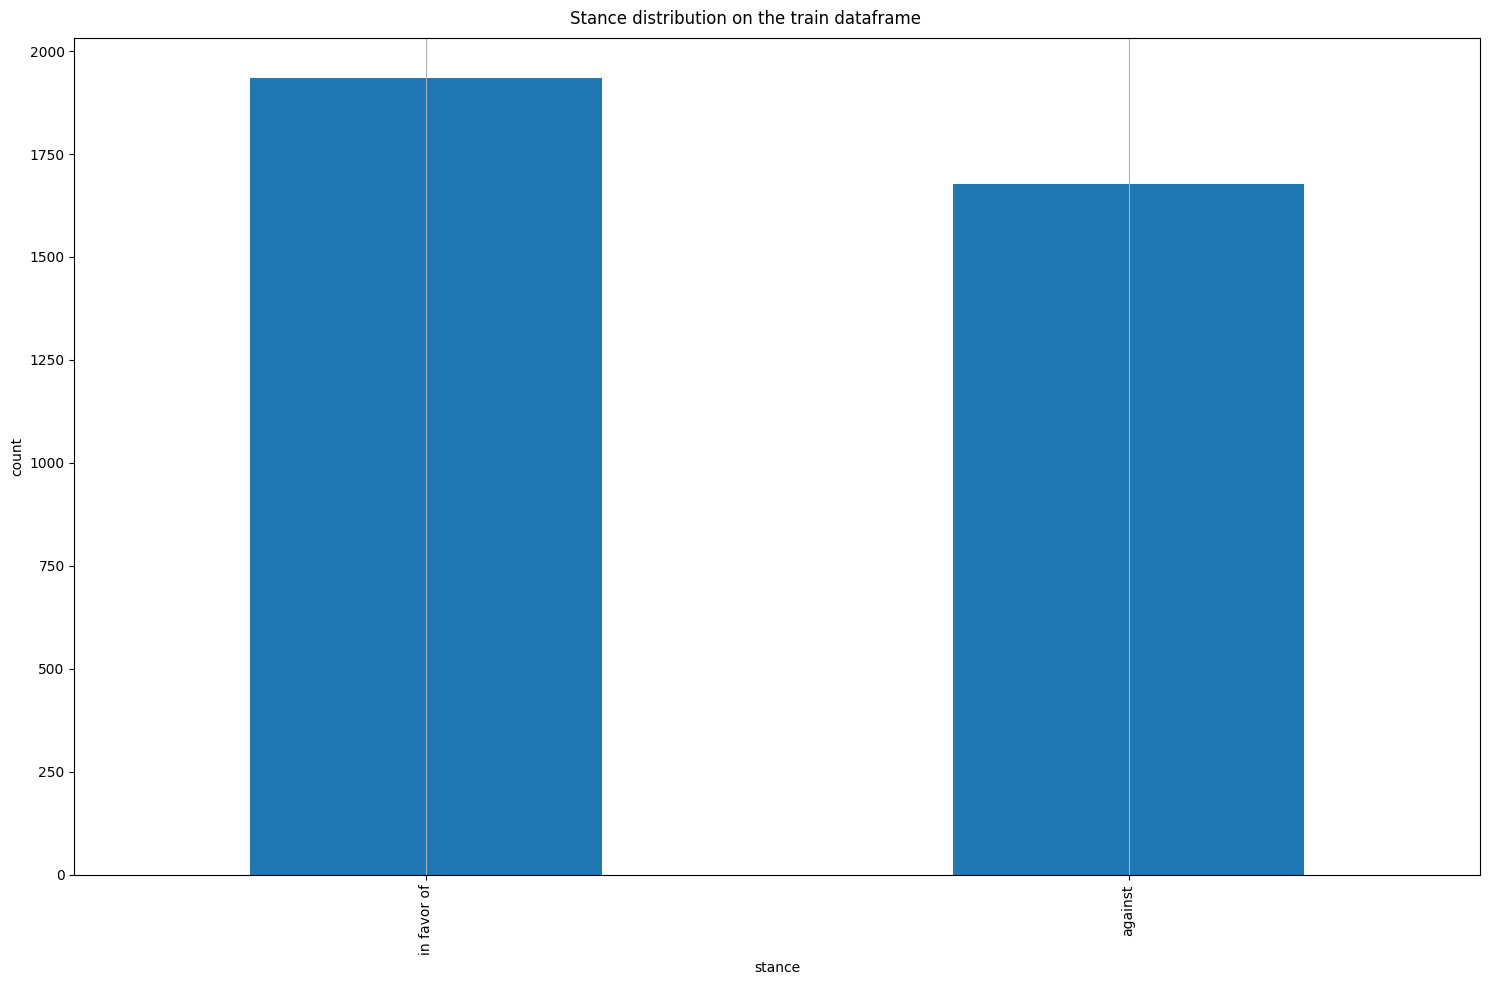

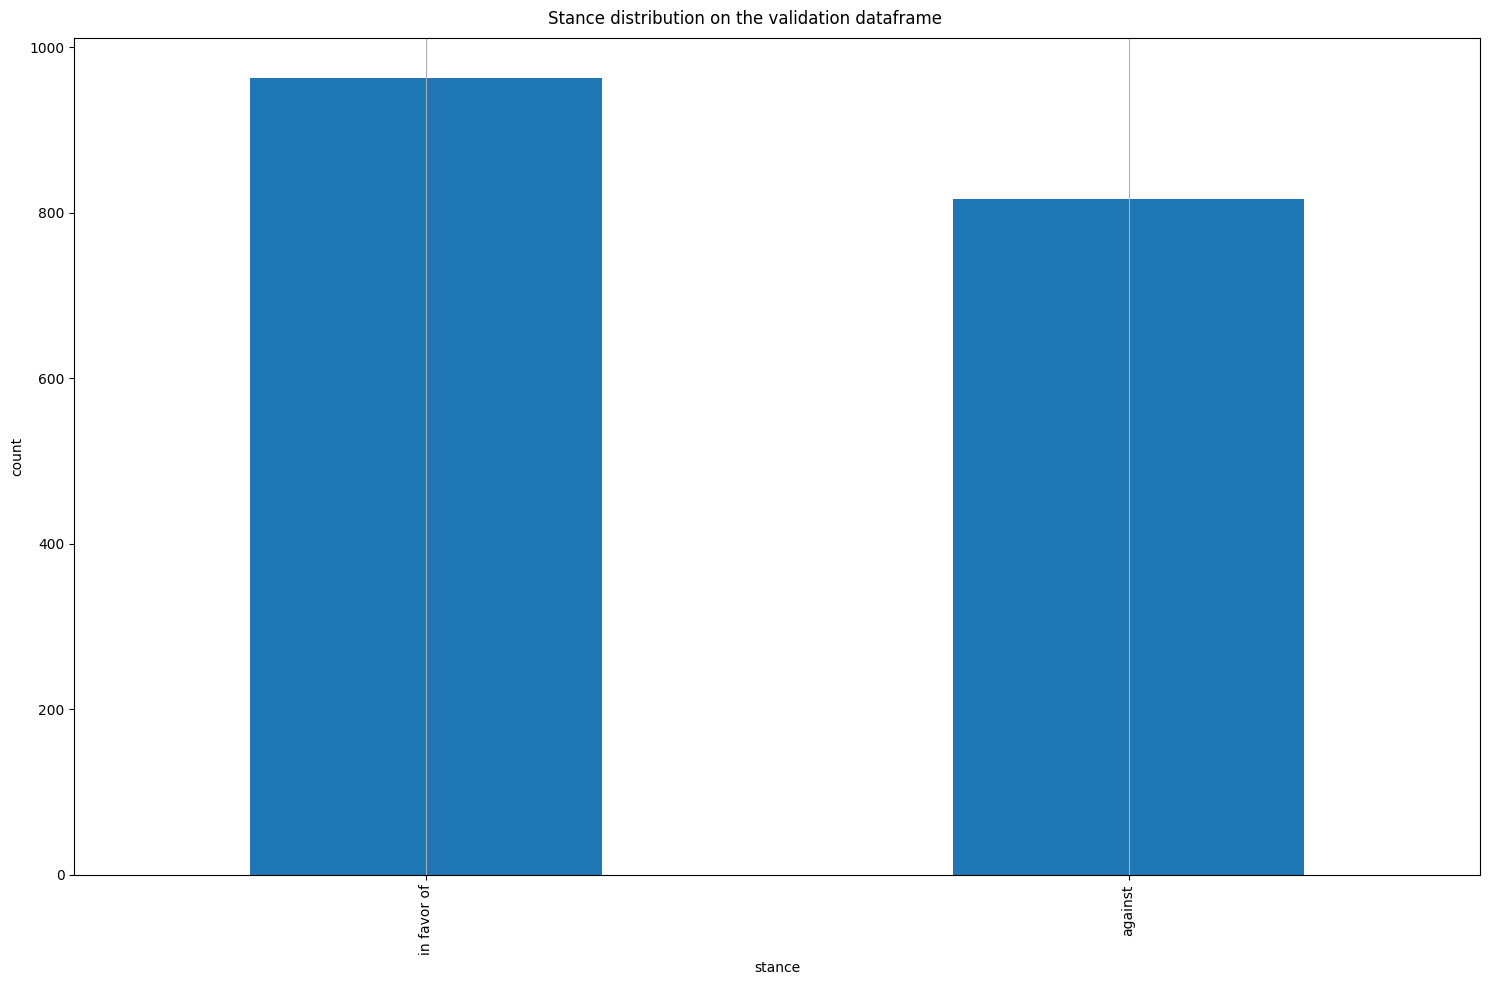

In [11]:
plot_stance_distribution(arguments_train_df, title='Stance distribution on the train dataframe')
plot_stance_distribution(arguments_val_df, title='Stance distribution on the validation dataframe')

In [12]:
import matplotlib.pyplot as plt 

def plot_sentiment_distribution(labels_df: pd.DataFrame, title: str = 'Sentiment values distribution'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 10))
    labels_train_df.sum().plot(ax=ax, kind='bar')


    # Show just the x grid
    ax.grid(axis='x')

    # set title and axis labels
    plt.suptitle('Sentiment values distribution')

    ax.set_xlabel('sentiment values')
    ax.set_ylabel('count')

    plt.tight_layout()

    plt.show()

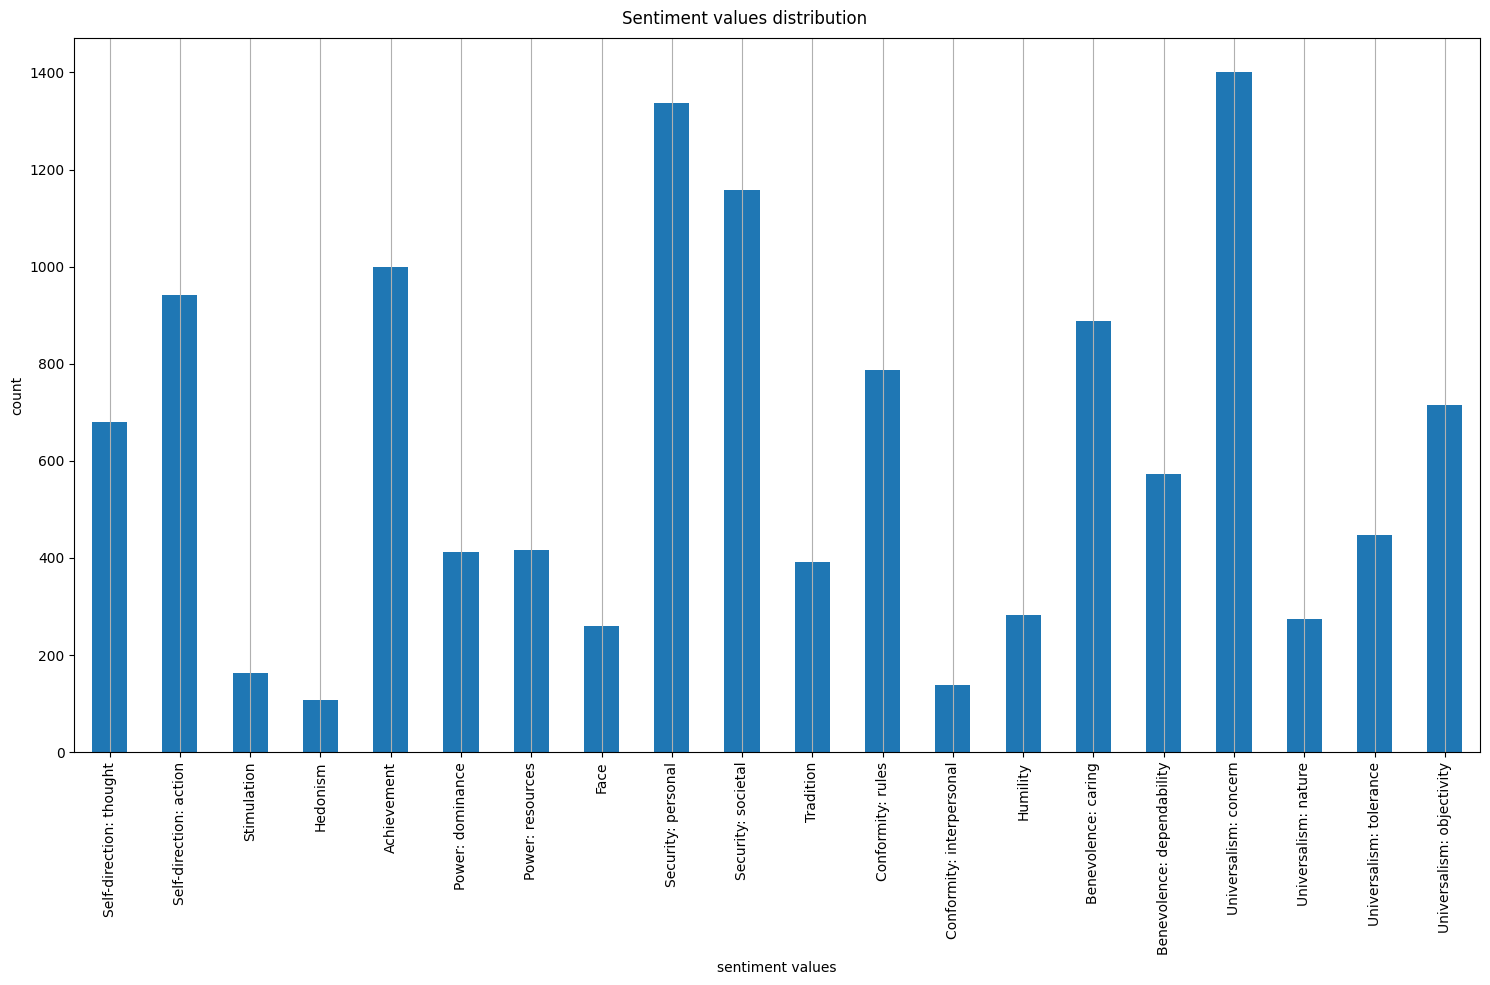

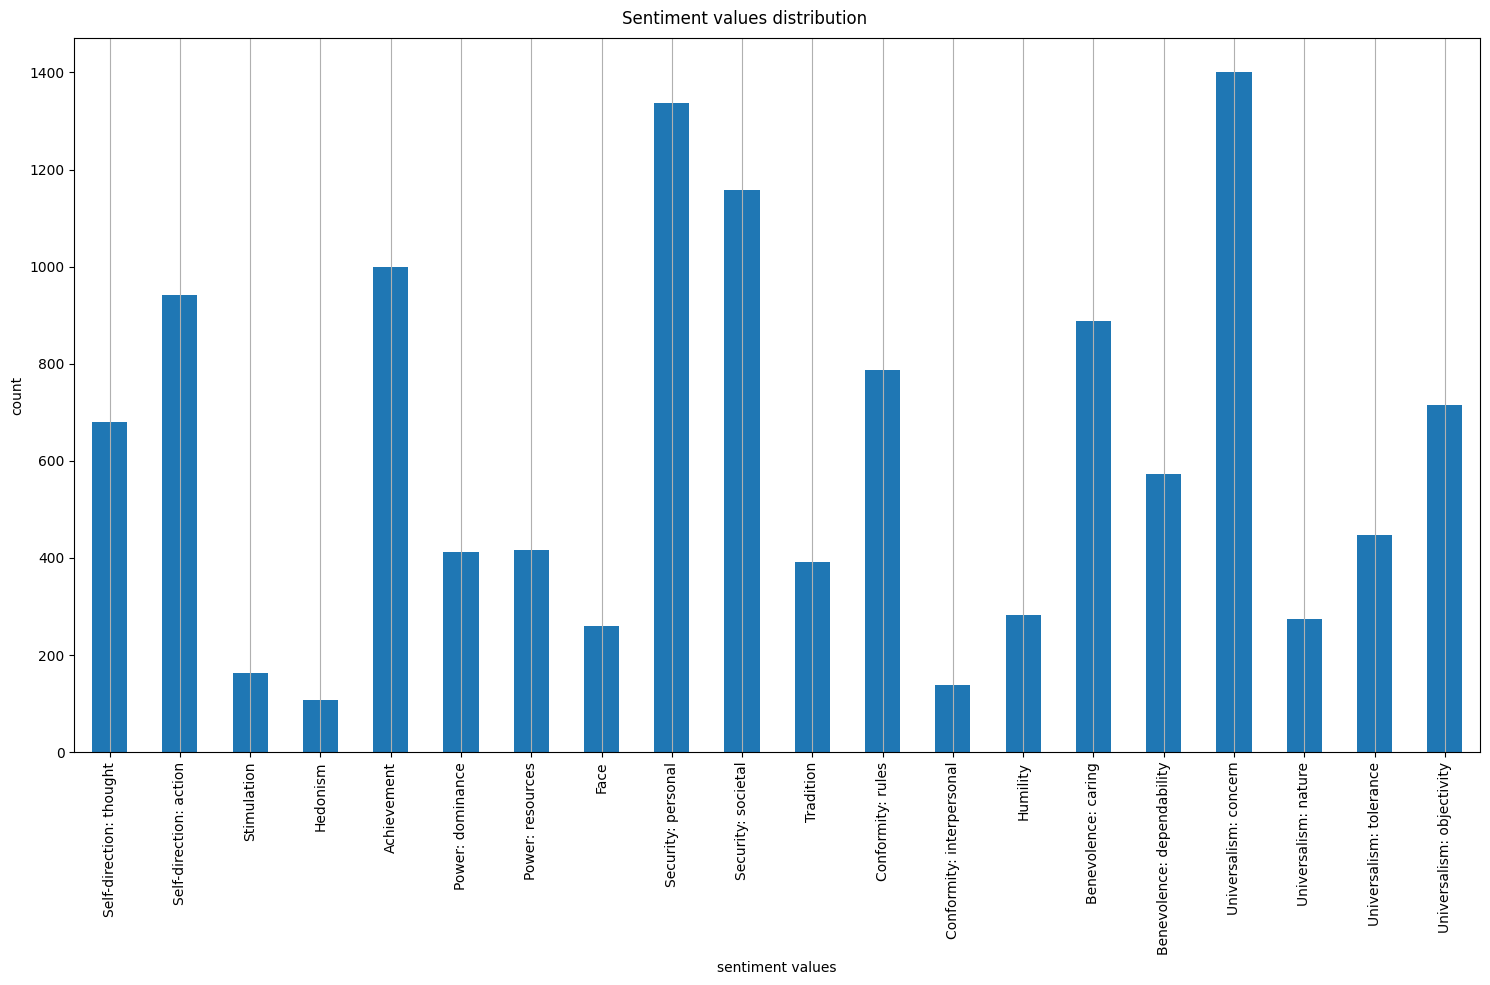

In [13]:
plot_sentiment_distribution(labels_train_df, title='Sentiment values distribution on the train dataframe')
plot_sentiment_distribution(labels_val_df, title='Sentiment values distribution on the validation dataframe')

In [14]:
import numpy as np

def plot_sequence_length_analysis(arguments_df: pd.DataFrame, df_name: str = 'dataset'):
    """Analyse the length of the premises + stances + conclusions
    Parameters
    ----------
    df : DataFrame
        A pandas dataframe.
    """
    # Length of each training sentence
    train_sentences_lenghts = arguments_df.Premise.str.len() + arguments_df.Conclusion.str.len() + 1

    # Histogram of the sentences length distribution
    hist, bin_edges = np.histogram(train_sentences_lenghts, bins=np.max(train_sentences_lenghts) + 1, density=True) 
    # Cumulative distribution of the sentences length
    C = np.cumsum(hist)*(bin_edges[1] - bin_edges[0])

    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(bin_edges[1:], hist)
    plt.title(f'Distribution of the sentence length across the {df_name}')
    plt.xlabel('Sentence length')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(bin_edges[1:], C)
    plt.title(f'Comulative distribution of the sentence length across the {df_name}')
    plt.xlabel('Sentence length')
    plt.grid()
    plt.show()

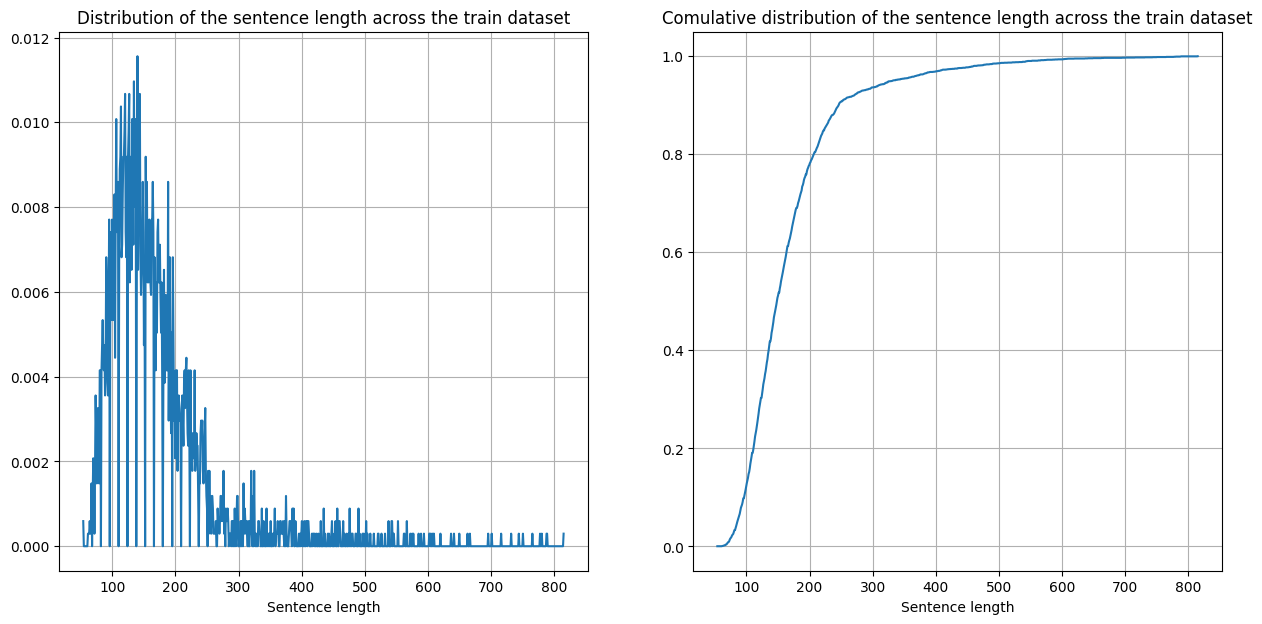

In [15]:
plot_sequence_length_analysis(arguments_train_df, df_name='train dataset')

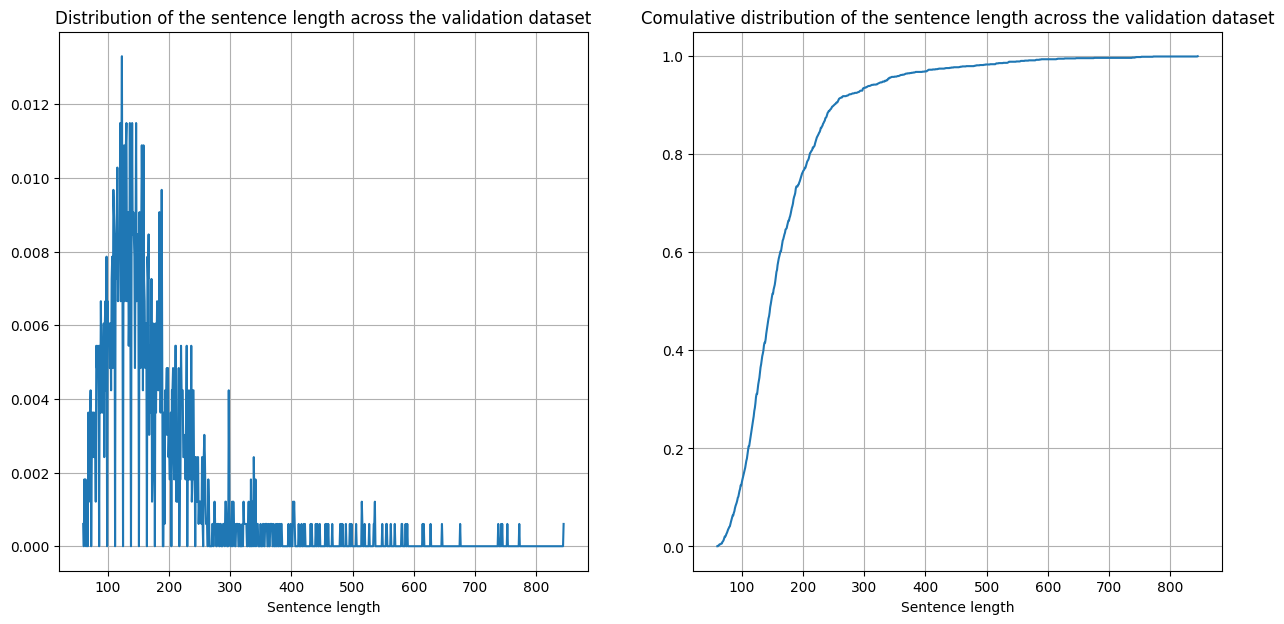

In [16]:
plot_sequence_length_analysis(arguments_val_df, df_name='validation dataset')

In [17]:
quantile_95 = (arguments_train_df.Premise.str.len() + arguments_train_df.Conclusion.str.len() + 1).quantile(.95, interpolation='nearest')

print(f'The 95th quantile of input lengths in the train dataset is: {quantile_95}')

The 95th quantile of input lengths in the train dataset is: 331


In [18]:
total_corpus = arguments_train_df.Conclusion.tolist() + arguments_train_df.Premise.tolist()

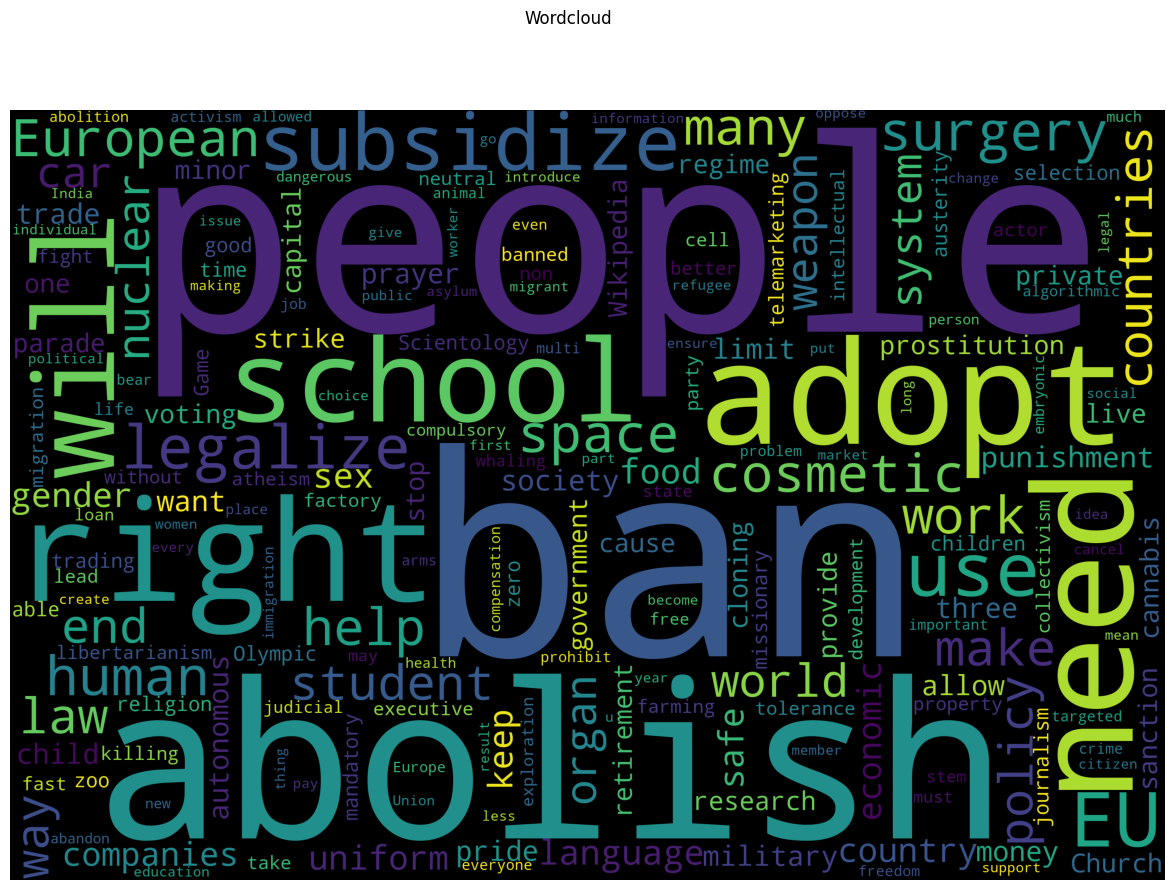

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_cloud = WordCloud(width=3000, height=2000, collocations=False, stopwords=STOPWORDS).generate(' '.join(total_corpus))
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud)
plt.suptitle('Wordcloud') 
plt.axis("off")
plt.show()

In [20]:
# Importing the libraries needed
import pandas as pd
import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer

In [21]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [22]:
len(labels_train_df.columns.to_list())

20

In [23]:
#label_to_number_dict = {l: i for i, l in enumerate(labels_train_df.columns.to_list()[1:])}
#number_to_label_dict = {i: l for l, i in label_to_number_dict.items()}

In [24]:
#model_name = 'distilbert-base-cased'
model_name = 'distilroberta-base'

In [25]:
from transformers import AutoTokenizer

# Defining some key variables that will be used later on in the training
MAX_LEN = quantile_95
TRAIN_BATCH_SIZE = 4
VAL_BATCH_SIZE = 4
EPOCHS = 3
LEARNING_RATE_BASE = 1e-05
LEARNING_RATE_HEAD = 1e-03
tokenizer = AutoTokenizer.from_pretrained(model_name, problem_type="multi_label_classification")


num_added_toks = tokenizer.add_tokens(['[FAV]', '[AGN]'], special_tokens=True) ##This line is updated

stance_encoder = {'in favor of': '[FAV]', 'against': '[AGN]'}

###The tokenizer has to be saved if it has to be reused
#tokenizer.save_pretrained(<output_dir>)

In [26]:
# Change from dataframe to numpy

class Triage(Dataset):
    def __init__(self, arguments_df: pd.DataFrame, labels_df: pd.DataFrame, tokenizer, max_len):
        self.len = len(arguments_df)
        self.arguments_data = arguments_df
        self.labels_data = labels_df
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __getitem__(self, index):
        premise = self.arguments_data.Premise[index]
        conclusion = self.arguments_data.Conclusion[index]
        stance = stance_encoder[self.arguments_data.Stance[index]]
        
        input_text = premise + f' {stance} ' + conclusion
        
        '''inputs = self.tokenizer.encode_plus(
            input_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding=True,
            #return_token_type_ids=False,
            truncation=True
        )'''
        ''' ids = inputs['input_ids']
        mask = inputs['attention_mask']'''
        
        return input_text, self.labels_data.loc[index].to_list()

        '''return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'labels': torch.tensor(self.labels_data.loc[index].to_list(), dtype=torch.long)
        } '''
    
    def __len__(self):
        return self.len

In [27]:
# Creating the dataset and dataloader for the neural network
train_set = Triage(arguments_train_df, labels_train_df, tokenizer, MAX_LEN)
val_set = Triage(arguments_test_df, labels_test_df, tokenizer, MAX_LEN)

In [28]:
def collate_batch(batch):
    input_texts = []
    labels = []
    
    for t, l in batch:
        input_texts.append(t)
        labels.append(l)
    
    inputs = tokenizer(
        input_texts,
        None,
        add_special_tokens=True,
        max_length=MAX_LEN,
        padding=True,
        truncation=True,
        return_tensors='pt')
    ids = inputs['input_ids']
    mask = inputs['attention_mask']
    
    return {
        'ids': ids,
        'mask': mask,
        'labels': torch.tensor(labels, dtype=torch.float32)
    }

dataloader_params = {
    'shuffle': True,
    'num_workers': 0,
    'collate_fn': collate_batch
}

train_params = {**dataloader_params, 'batch_size': TRAIN_BATCH_SIZE}

val_params = {**dataloader_params, 'batch_size': VAL_BATCH_SIZE}


In [29]:
training_loader = DataLoader(train_set, **train_params)
val_loader = DataLoader(val_set, **val_params)

val_loader_eval = DataLoader(val_set, collate_fn=collate_batch, batch_size=len(val_set), num_workers=0)

In [30]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 
'''
class DistillBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistillBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, len(labels_train_df.columns) - 1)

    def forward(self, input_ids, attention_mask):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output'''

'\nclass DistillBERTClass(torch.nn.Module):\n    def __init__(self):\n        super(DistillBERTClass, self).__init__()\n        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")\n        self.pre_classifier = torch.nn.Linear(768, 768)\n        self.dropout = torch.nn.Dropout(0.3)\n        self.classifier = torch.nn.Linear(768, len(labels_train_df.columns) - 1)\n\n    def forward(self, input_ids, attention_mask):\n        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)\n        hidden_state = output_1[0]\n        pooler = hidden_state[:, 0]\n        pooler = self.pre_classifier(pooler)\n        pooler = torch.nn.ReLU()(pooler)\n        pooler = self.dropout(pooler)\n        output = self.classifier(pooler)\n        return output'

In [31]:
from transformers import AutoModelForSequenceClassification


model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(labels_train_df.columns),
    ignore_mismatched_sizes=True,
    problem_type="multi_label_classification")

model.resize_token_embeddings(len(tokenizer))

model.to(device)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.weight'

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50267, 768)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [32]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50267, 768)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs,  targets.float())
        loss = self.alpha * (1 - torch.exp(-bce_loss)) ** self.gamma * bce_loss
        return loss

In [34]:

# Creating the loss function and optimizer
#loss_function = torch.nn.BCEWithLogitsLoss()
loss_function = FocalLoss()
optimizer = torch.optim.Adam(params=[
                {'params': model.roberta.parameters(), 'lr': LEARNING_RATE_BASE},
                {'params': model.classifier.parameters(), 'lr': LEARNING_RATE_HEAD}
            ])

In [35]:
# Function to calcuate the accuracy of the model

def calculate_accuracy(out, targets, threshold=.5):
    out = out.sigmoid()
    return ((out > threshold) == targets.bool()).float().mean().item()

In [36]:
import os

class Checkpoint():
    def __init__(self, model, path = None) -> None:
        self.model = model
        self.last_accuracy = .0
        self.path = path if path is not None else os.path.join('checkpoints', 'checkpoints.pth')
        os.makedirs(os.path.dirname(self.path), exist_ok=True)

    def save_best(self, new_accuracy, train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history) -> None:
        #print(self.model.state_dict())
        if new_accuracy > self.last_accuracy:
            checkpoint = {
                'model_state_dict': self.model.state_dict(),
                'train_loss_history': np.array(train_loss_history),
                'train_accuracy_history': np.array(train_accuracy_history),
                'val_loss_history': np.array(val_loss_history),
                'val_accuracy_history': np.array(val_accuracy_history)
            }

            torch.save(checkpoint, self.path)

        self.last_accuracy = new_accuracy
    
    def load_best(self) -> None:
        checkpoint = torch.load(self.path)
        model.load_state_dict(checkpoint['model_state_dict'])


In [37]:
class EarlyStopping():
    def __init__(self, patience=2, tolerance=0.003) -> None:
        self.patience = patience
        self.tolerance = tolerance
        self.trigger_times = 0
        self.last_loss = None
        self.stop_condition = False

    def update(self, loss):
        if self.last_loss is None or loss - self.last_loss < self.tolerance:
            self.trigger_times = 0
        else:
            self.trigger_times += 1

            if self.trigger_times >= self.patience:
                self.stop_condition = True

        self.last_loss = loss

    def is_stop_condition_met(self):
        return self.stop_condition


In [38]:
from IPython.display import DisplayHandle
import os
import sys
from time import time
from transformers import AutoModelForSequenceClassification
from typing import Optional


def _loss_validate(val_dataloader: DataLoader, eary_stopping: EarlyStopping):
    print()
    # disp = display('', display_id=True)

    # Variables for accumulating the loss1 and loss2
    running_loss = .0
    running_accuracy = .0

    # Number of evaluated samples
    batch_step = 0

    # Starting time
    start_time = time()

    torch.cuda.empty_cache()

    # Iterate over all batches
    for batch_idx, data in enumerate(val_dataloader, 0):
        with torch.no_grad():
            # Update number of evaluated samples
            batch_step += 1
            
            # Get the data
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['labels'].to(device, dtype = torch.float32)
        
            # Compute output
            outputs = model(ids, mask)
            
            # Loss
            loss = loss_function(outputs.logits, targets)
            running_loss += loss.item()

            accuracy = calculate_accuracy(outputs.logits, targets)
            running_accuracy += accuracy

        current_time = time() - start_time

        # Print results
        print(
            f'validate {batch_idx + 1}/{len(val_dataloader)}, ' +
            f'{current_time:.0f}s {current_time / (batch_idx + 1) * 1e3:.0f}ms/step, ' +
            f'validation loss: {running_loss / batch_step:.3g}, '
            f'validation accuracy: {running_accuracy * 100 / batch_step:.3g} %' +
            '               ',
            end='\r'
            )

    final_loss = running_loss / batch_step
    final_accuracy = running_accuracy / batch_step
    
    print(
        f'validate: ' +
        f'{current_time:.0f}s {current_time / (batch_idx + 1) * 1e3:.0f}ms/step, ' +
        f'validation loss: {running_loss / batch_step:.3g}, '
        f'validation accuracy: {running_accuracy * 100 / batch_step:.3g} %' +
        '               '
        )

    eary_stopping.update(final_loss)

    return final_loss, final_accuracy



def train(train_dataloader: DataLoader, val_dataloader: DataLoader, model: AutoModelForSequenceClassification, 
          epochs: int = 3, steps_validate: int = 100, checkpoint_path: Optional[str] = None,
          reload_best_weights: bool = True) -> None:

    checkpoint = Checkpoint(model, checkpoint_path)
    # Create path to save checkpoints
    '''if checkpoint_path is None:
        checkpoint_path = os.path.join('checkpoints', 'checkpoints.pth')''';

    #os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
    
    early_stopping = EarlyStopping()
    
    train_loss_history = []
    val_loss_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    # Total steps to perform
    # tot_steps = len(train_dataloader) * epochs
    # Number of step already done
    n_steps = 0
    
    model.train()

    # Iterate across the epochs
    for epoch in range(epochs):
        # Set up display element
        #disp = display('', display_id=True)

        # Remove unused tensors from gpu memory
        torch.cuda.empty_cache()

        # Initialize running losses
        running_loss = 0.0
        running_accuracy = 0.0
        
        optimizer.zero_grad()

        start_time = time()

        # Number of batches for the current update step
        batch_steps = 0

        for batch_idx, data in enumerate(train_dataloader, 0):
            # Increment the number of batch steps
            batch_steps += 1

            # Get the data
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['labels'].to(device, dtype = torch.float32)
        
            # Compute output
            outputs = model(ids, mask)
            
            # Loss
            loss = loss_function(outputs.logits, targets)
            running_loss += loss.item()

            accuracy = calculate_accuracy(outputs.logits, targets)
            running_accuracy += accuracy

            optimizer.zero_grad()
            #nb_tr_steps += 1
            loss.backward()
            
            # When using GPU
            optimizer.step()

            # Evaluate on validation set
            if batch_idx % steps_validate == steps_validate - 1:
                torch.cuda.empty_cache()
                # Compute both the token importances validation loss and the answer generation validation loss
                val_loss, val_accuracy = _loss_validate(val_dataloader, early_stopping)
                # Update validation loss history
                val_loss_history.append((n_steps, val_loss))
                val_accuracy_history.append((n_steps, val_accuracy))
                
                checkpoint.save_best(val_accuracy, train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history)

                torch.cuda.empty_cache()

                if early_stopping.is_stop_condition_met():
                    return train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history


            # Update training history and print
            # TODO: should print running or batch accuracy?                
            train_loss_history.append(loss.item())
            train_accuracy_history.append(accuracy)
            
            epoch_time = time() - start_time
            batch_time = epoch_time / (batch_idx + 1)
            
            # TODO: function to print batch string
            print(
                f'epoch: {epoch + 1}/{epochs}, ' +
                f'{batch_idx + 1}/{len(train_dataloader)}, '
                f'{epoch_time:.0f}s {batch_time * 1e3:.0f}ms/step, ' +
                f'lr base: {optimizer.param_groups[0]["lr"]:.3g} lr head: {optimizer.param_groups[1]["lr"]:.3g}, ' +
                f'loss: {running_loss / batch_steps:.3g}, ' + 
                f'accuracy: {running_accuracy * 100 / batch_steps:.3g} %' +
                '               ',
                end='\r'
                )

            n_steps += 1
        
        print()
        
        torch.cuda.empty_cache()
        # Compute both the token importances validation loss and the answer generation validation loss
        val_loss, val_accuracy = _loss_validate(val_dataloader, early_stopping)
        # Update validation loss history
        val_loss_history.append([n_steps, val_loss])
        val_accuracy_history.append([n_steps, val_accuracy])
        
        checkpoint.save_best(val_accuracy, train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history)

        torch.cuda.empty_cache()

        print(
            f'epoch: {epoch + 1}/{epochs}, ' +
            f'{epoch_time:.0f}s, ' +
            f'lr base: {optimizer.param_groups[0]["lr"]:.3g} lr head: {optimizer.param_groups[1]["lr"]:.3g}, ' +
            f'loss: {running_loss / batch_steps:.3g} val loss:, {val_loss:.3g}, ' + 
            f'accuracy: {running_accuracy * 100 / batch_steps:.3g} % val accuracy: {val_accuracy * 100:.3g} %'
            )

        if early_stopping.is_stop_condition_met():
            return train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history

    if reload_best_weights:
        checkpoint.load_best()
        
    print(val_accuracy_history)
        

    return train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history


In [39]:
_ = train(training_loader, val_loader, model, epochs = 3, steps_validate = 300)

True
epoch: 1/3, 299/904, 35s 115ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.043, accuracy: 84.1 %                
validate: 11s 24ms/step, validation loss: 0.0369, validation accuracy: 84.8 %                       
epoch: 1/3, 599/904, 80s 133ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0385, accuracy: 84.7 %               
validate: 13s 27ms/step, validation loss: 0.034, validation accuracy: 85.4 %                        
epoch: 1/3, 899/904, 123s 137ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0354, accuracy: 85.2 %               
validate: 10s 22ms/step, validation loss: 0.0332, validation accuracy: 86.2 %                       
epoch: 1/3, 904/904, 135s 149ms/step, lr base: 1e-05 lr head: 0.001, loss: 0.0354, accuracy: 85.2 %               

validate: 11s 22ms/step, validation loss: 0.034, validation accuracy: 85.9 %                        
epoch: 1/3, 135s, lr base: 1e-05 lr head: 0.001, loss: 0.0354 val loss:, 0.034, accuracy: 85.2 % val accuracy: 85.87816573899507 %
e

In [38]:
checkpoint = torch.load('checkpoints/checkpoints.pth')

# Get loss history and validation loss history
model.load_state_dict(checkpoint['model_state_dict'])
train_loss_history = checkpoint['train_loss_history']
validation_loss_history = checkpoint['val_loss_history']
train_accuracy_history = checkpoint['train_accuracy_history']
validation_accuracy_history = checkpoint['val_accuracy_history']

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def _plot_loss_subplot(train_history: np.ndarray, validation_history: np.ndarray, subplot_index: int, n_batches: int,
                       use_log_scale: bool = False) -> None:
    metric = 'accuracy' if subplot_index % 2 == 0 else 'loss'
    
    plt.subplot(2, 1, subplot_index)

    plt.title(f'{metric.capitalize()} history{" using log scale" if use_log_scale else ""}')

    plt.plot(train_history, label=f'Training {metric}')
    
    averaged_train_history = np.convolve(train_history, np.ones(n_batches)/n_batches, mode='valid')
    
    #print(len(train_history), len(averaged_train_history))
    
    plt.plot(np.linspace(0, len(train_history), len(averaged_train_history)), averaged_train_history,
             label=f'Training {metric} averaged on {n_batches} batches')
    
    #plt.plot(np.convolve(training_loss_history[:,loss_index], np.ones(n_batches)/n_batches, mode='valid'), 
    #         label=f'Training loss averaged on {n_batches} batches')

    # Plot validation history if present
    plt.plot(validation_history[:,0], validation_history[:,1], 'r*', label=f'Validation {metric}')
    
    plt.xlabel('iterations')
    
    # Use log scale if specified
    if use_log_scale:
        plt.yscale('log')
        plt.ylabel(f'{metric} (log)')
    else:
        plt.ylabel(metric)

    plt.legend()


def plot_training_history(checkpoints_path: str) -> None:
    # Load model checkpoints
    checkpoint = torch.load(checkpoints_path)

    # Get loss history and validation loss history
    train_loss_history = checkpoint['train_loss_history']
    validation_loss_history = checkpoint['val_loss_history']
    train_accuracy_history = checkpoint['train_accuracy_history']
    validation_accuracy_history = checkpoint['val_accuracy_history']
    
    n_batches = 50

    plt.figure(figsize=(15,12))
    plt.subplot(2,1,1)
    plt.suptitle('Training procedure analysis')
    
    # Plot loss history of the Token Importances Extractor module
    _plot_loss_subplot(train_loss_history, validation_loss_history, 1, n_batches, use_log_scale=False)

    # Plot loss history of the Seq2seq module
    _plot_loss_subplot(train_accuracy_history, validation_accuracy_history, 2, n_batches, use_log_scale=False)

    # Plot loss history of the Token Importances Extractor module in log scale
    #_plot_loss_subplot(train_loss_history, validation_loss_history, 3, n_batches, use_log_scale=True)

    # Plot loss history of the Seq2seq module in log scale
    #_plot_loss_subplot(train_accuracy_history, validation_accuracy_history, 4, n_batches, use_log_scale=True)
    
    plt.show()

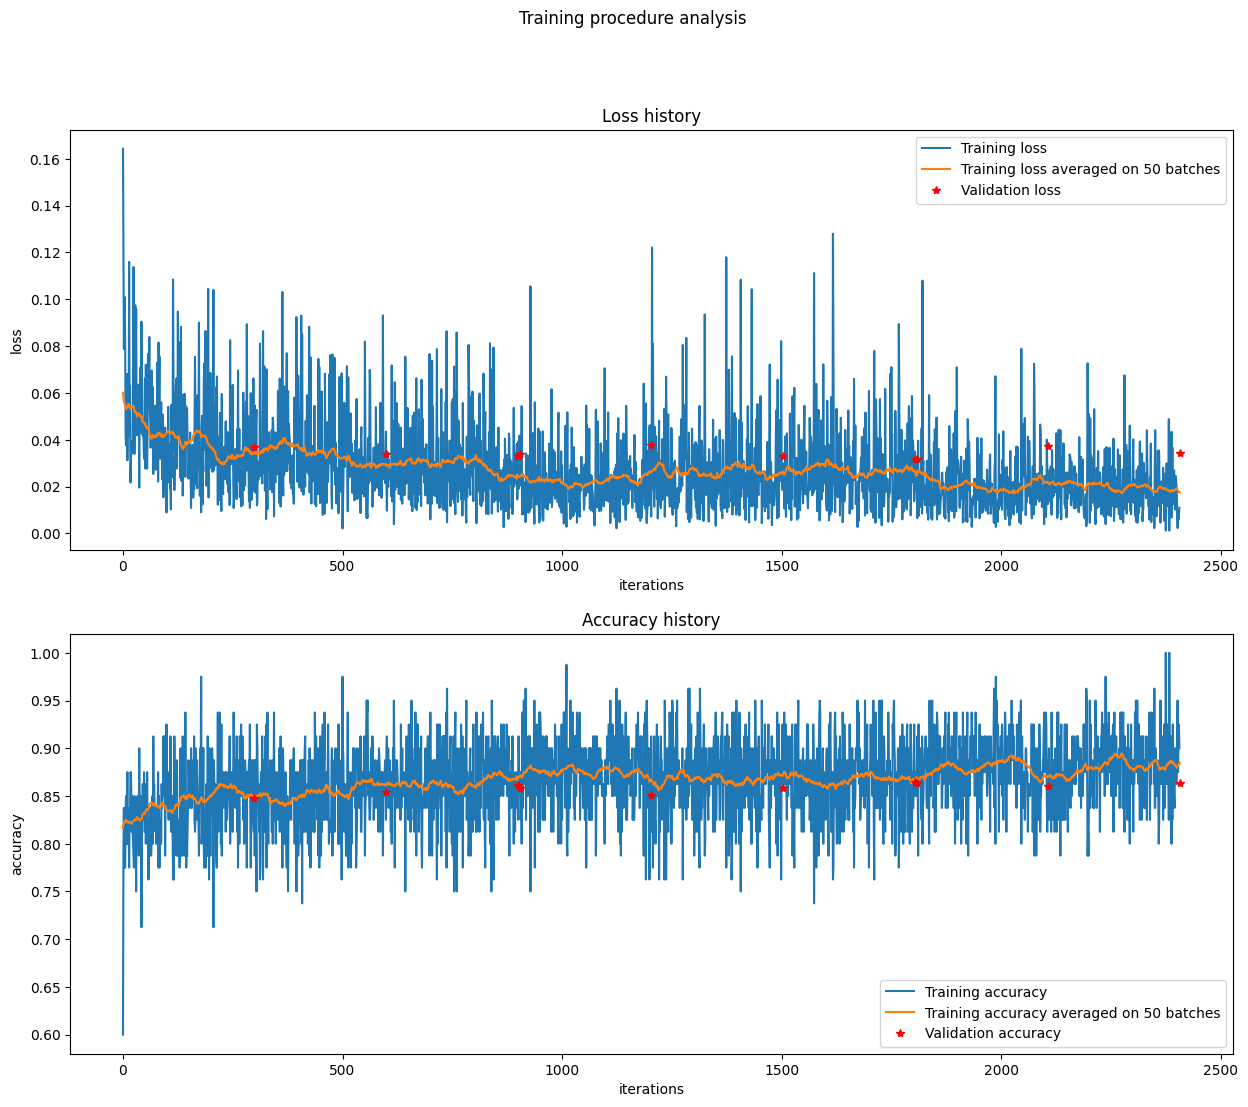

In [40]:
plot_training_history('checkpoints/checkpoints.pth')

In [66]:
'''def get_true_labels(dataloader: DataLoader):
    true_labels = np.empty(shape=(0, len(labels_test_df.columns)), dtype=np.uint8)

    for batch_idx, data in enumerate(dataloader, 0):
        # Get the data
        targets = data['labels'].cpu().numpy().astype(np.uint8)
        true_labels = np.concatenate((true_labels, targets), axis=0)

    return true_labels'''

In [67]:
'''y_true = get_true_labels(val_loader)'''

In [120]:
def predict(dataloader: DataLoader):
    predictions = np.empty(shape=(0, len(labels_test_df.columns)), dtype=np.uint8)
    true_labels = np.empty(shape=(0, len(labels_test_df.columns)), dtype=np.uint8)
    
    for batch_idx, data in enumerate(dataloader, 0):
        # Get the data
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
    
        # Compute output
        outputs = model(ids, mask)
        
        results = outputs.logits.sigmoid()
        results = results >= .5
        results = results.cpu().numpy()
        results = results.astype(np.uint8)
        
        predictions = np.concatenate((predictions, results), axis=0)
        
        targets = data['labels'].cpu().numpy().astype(np.uint8)
        true_labels = np.concatenate((true_labels, targets), axis=0)
        
        #print(results)
        #print(targets.cpu().numpy().astype(np.uint8))
    return predictions, true_labels

In [121]:
y_pred, y_true = predict(val_loader)

In [122]:
# Validation f1-score
from sklearn.metrics import f1_score

f1_macro = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

print(f'Test f1-score macro on the validation set: {f1_macro:.3f}')

Test f1-score macro: 0.348


0.12

In [123]:
from sklearn.metrics import classification_report

class_report = classification_report(y_true=y_true, y_pred=y_pred, target_names=labels_train_df.columns.to_list(),
                                     zero_division=0, output_dict=True)

print(classification_report(y_true=y_true, y_pred=y_pred,
                            target_names=labels_train_df.columns.to_list(), zero_division=0))

                            precision    recall  f1-score   support

   Self-direction: thought       0.60      0.46      0.52       251
    Self-direction: action       0.66      0.36      0.47       496
               Stimulation       0.40      0.01      0.03       138
                  Hedonism       0.69      0.11      0.18       103
               Achievement       0.80      0.45      0.58       575
          Power: dominance       0.36      0.21      0.27       164
          Power: resources       0.59      0.18      0.28       132
                      Face       0.42      0.04      0.07       130
        Security: personal       0.70      0.80      0.75       759
        Security: societal       0.62      0.67      0.64       488
                 Tradition       0.72      0.25      0.37       172
         Conformity: rules       0.69      0.24      0.36       455
 Conformity: interpersonal       0.67      0.07      0.12        60
                  Humility       0.00      0.00

In [41]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0

    for i, data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        targets = data['labels'].to(device, dtype = torch.float32)
       
        outputs = model(ids, mask)
        
        loss = loss_function(outputs.logits, targets)
        tr_loss += loss.item()

        n_correct += calculate_accuracy(outputs.logits, targets)

        nb_tr_steps += 1
        
        if i % 5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct * 100)/nb_tr_steps 
            print(f'Training Loss per 5000 steps: {loss_step}')
            print(f'Training Accuracy per 5000 steps: {accu_step}')

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct * 100) / nb_tr_steps}')
    epoch_loss = tr_loss / nb_tr_steps
    epoch_accu = (n_correct * 100) / nb_tr_steps
    print(f"Training Loss Epoch {epoch}: {epoch_loss}")
    print(f"Training Accuracy Epoch {epoch}: {epoch_accu}")

    return 
     

In [42]:
for epoch in range(EPOCHS):
    model.train()
    train(epoch)

Training Loss per 5000 steps: 0.012279205955564976
Training Accuracy per 5000 steps: 88.7499988079071


KeyboardInterrupt: 